In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import plotnine as pn
import seaborn as sns
import scanpy.external as sce
import gseapy

In [144]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()
sc.settings.set_figure_params(dpi=80, dpi_save= 300, fontsize=6, frameon=True, figsize=(3, 3), transparent=True, format="pdf")

-----
anndata     0.7.5
scanpy      1.8.1
sinfo       0.3.1
-----
OpenSSL             20.0.1
PIL                 8.1.1
adjustText          NA
anndata             0.7.5
anyio               NA
appdirs             1.4.4
argon2              20.1.0
asciitree           NA
attr                20.3.0
babel               2.9.0
backcall            0.2.0
bioservices         1.7.11
brotli              NA
bs4                 4.9.3
bson                NA
cairo               1.20.0
certifi             2021.05.30
cffi                1.14.5
chardet             4.0.0
cloudpickle         1.3.0
colorama            0.4.4
colorlog            NA
cryptography        3.4.4
cycler              0.10.0
cython_runtime      NA
dask                2021.02.0
dateutil            2.8.1
decorator           4.4.2
descartes           NA
docutils            0.16
easydev             0.11.0
fasteners           NA
future_fstrings     NA
google              NA
gprofiler           1.0.0
gridfs              NA
gseapy            

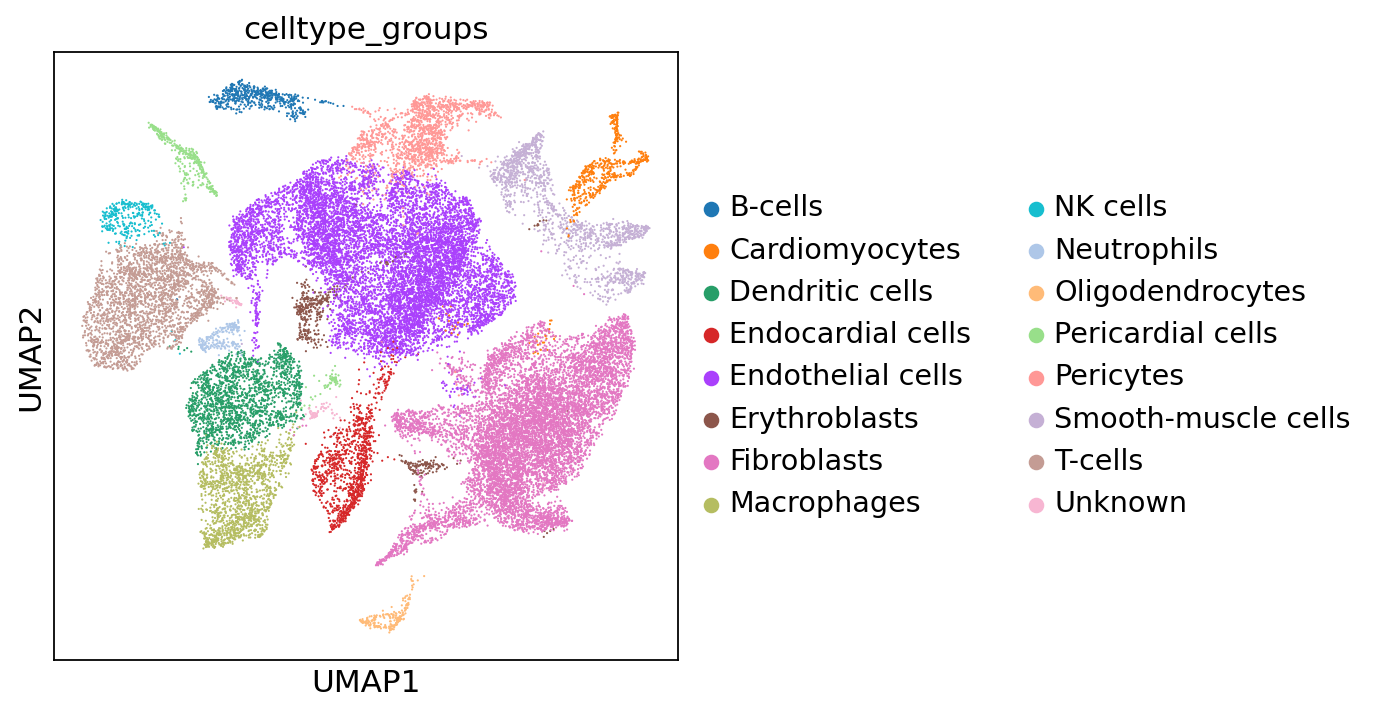

In [6]:
heart_infection_sc_no_viral_genes = sc.read_h5ad(filename="./../pyobjs/heart_infection_sc_4samples_no_viral_genes2.h5ad")
sc.pl.umap(heart_infection_sc_no_viral_genes, color = ["celltype_groups"])

In [7]:
tcells = heart_infection_sc_no_viral_genes.raw.to_adata()[heart_infection_sc_no_viral_genes.obs["celltype_groups"].isin(["T-cells"])]
sc.pp.filter_genes(tcells, min_cells = 10)
tcells

filtered out 9402 genes that are detected in less than 10 cells


Trying to set attribute `.var` of view, copying.


AnnData object with n_obs × n_vars = 2471 × 13355
    obs: 'sample', 'T1LReoS1', 'T1LReoS2', 'T1LReoS3', 'T1LReoS4', 'T1LReoM1', 'T1LReoM2', 'T1LReoM3', 'T1LReoL1', 'T1LReoL2', 'T1LReoL3', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_viral', 'pct_viral', 'stage', 'state', 'condition', 'n_genes', 'S_score', 'G2M_score', 'phase', 'umap_density_condition', 'leiden_0.8', 'leiden_0.5', 'leiden_0.3', 'leiden_0.1', 'celltypes_leiden_0.3', 'celltypes_leiden_0.5', 'leiden_0.4', 'leiden_0.45', 'celltype_groups', 'T1LReoS1_xGen', 'T1LReoS2_xGen', 'T1LReoS3_xGen', 'T1LReoS4_xGen', 'T1LReoM1_xGen', 'T1LReoM2_xGen', 'T1LReoM3_xGen', 'T1LReoL1_xGen', 'T1LReoL2_xGen', 'T1LReoL3_xGen', 'total_viral_xGen', 'pct_viral_xGen', 'total_viral_NA', 'total_viral_xGen_NA', 'T1LReoS1_xGen2', 'T1LReoS2_xGen2', 'T1LReoS3_xGen2', 'T1LReoS4_xGen2', 'T1LReoM1_xGen2', 'T1LReoM2_xGen2', 'T1LReoM3_xGen2', 'T1LReoL1_xGen2', 'T1LReoL2_xGen2', 'T1LReoL3_xGen2', 'total_viral_xGe

In [8]:
s_genes = list(pd.read_csv("./../s.genes.txt")["x"])
g2m_genes = list(pd.read_csv("./../g2m.genes.txt")["x"])
print(s_genes)
print(g2m_genes)

['Mcm4', 'Exo1', 'Slbp', 'Gmnn', 'Cdc45', 'Msh2', 'Mcm6', 'Rrm2', 'Pold3', 'Blm', 'Ubr7', 'Mcm5', 'Clspn', 'Hells', 'Nasp', 'Rpa2', 'Rad51ap1', 'Tyms', 'Rrm1', 'Rfc2', 'Prim1', 'Brip1', 'Usp1', 'Ung', 'Pola1', 'Mcm2', 'Fen1', 'Tipin', 'Pcna', 'Cdca7', 'Uhrf1', 'Casp8ap2', 'Cdc6', 'Dscc1', 'Wdr76', 'E2f8', 'Dtl', 'Ccne2', 'Atad2', 'Gins2', 'Chaf1b', 'Pcna-ps2']
['Nuf2', 'Psrc1', 'Ncapd2', 'Ccnb2', 'Smc4', 'Lbr', 'Tacc3', 'Cenpa', 'Kif23', 'Cdca2', 'Anp32e', 'G2e3', 'Cdca3', 'Anln', 'Cenpe', 'Gas2l3', 'Tubb4b', 'Cenpf', 'Dlgap5', 'Hjurp', 'Cks1brt', 'Gtse1', 'Bub1', 'Birc5', 'Ube2c', 'Rangap1', 'Hmmr', 'Ect2', 'Tpx2', 'Ckap5', 'Cbx5', 'Nek2', 'Ttk', 'Cdca8', 'Nusap1', 'Ctcf', 'Cdc20', 'Cks2', 'Mki67', 'Tmpo', 'Ckap2l', 'Aurkb', 'Kif2c', 'Cdk1', 'Kif20b', 'Top2a', 'Aurka', 'Ckap2', 'Hmgb2', 'Cdc25c', 'Ndc80', 'Kif11']


normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:14)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


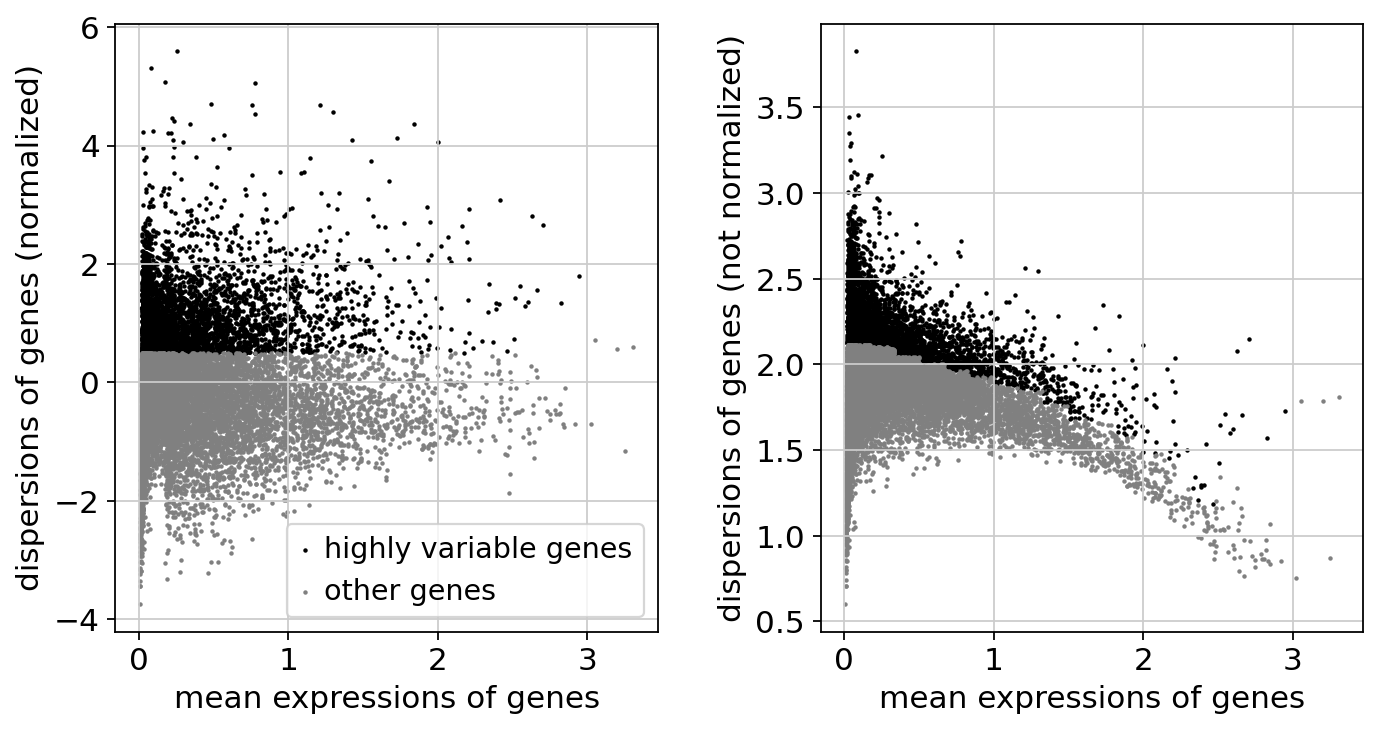

calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    544 total control genes are used. (0:00:00)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    712 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)
regressing out ['total_counts', 'pct_counts_mt', 'S_score', 'G2M_score']
    sparse input is densified and may lead to high memory use


/home/mm2937/miniconda3/envs/python385/lib/python3.8/site-packages/anndata/_core/anndata.py:1207: ImplicitModificationWarning: Initializing view as actual.
Trying to set attribute `.obs` of view, copying.
... storing 'phase' as categorical


    finished (0:03:38)
computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:02)


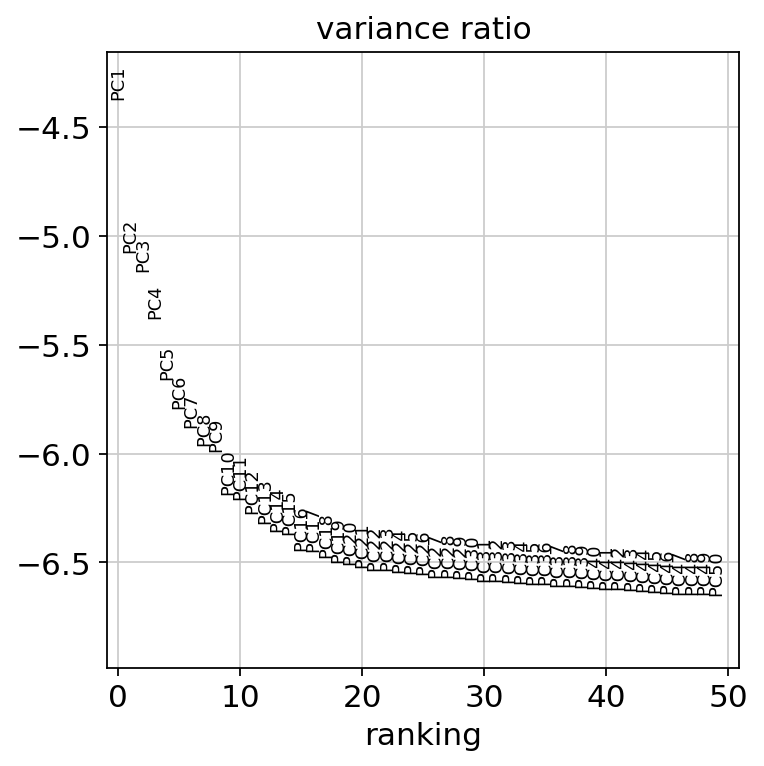

computing neighbors
    using 'X_pca' with n_pcs = 20
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:18)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:06)
running Leiden clustering
    finished: found 7 clusters and added
    'tcell_leiden_0.3', the cluster labels (adata.obs, categorical) (0:00:00)
running Leiden clustering
    finished: found 10 clusters and added
    'tcell_leiden_0.5', the cluster labels (adata.obs, categorical) (0:00:00)


In [9]:
sc.pp.normalize_total(tcells, target_sum=1e4)
sc.pp.log1p(tcells)
sc.pp.highly_variable_genes(tcells, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(tcells)
sc.tl.score_genes_cell_cycle(tcells, s_genes=s_genes, g2m_genes=g2m_genes, )
tcells.raw = tcells
tcells = tcells[:, tcells.var.highly_variable]
sc.pp.regress_out(tcells, keys=['total_counts', 'pct_counts_mt', 'S_score', 'G2M_score'], n_jobs=20)
sc.pp.scale(tcells, max_value=10)
sc.tl.pca(tcells, svd_solver='arpack')
sc.pl.pca_variance_ratio(tcells, n_pcs = 50, log=True)
sc.pp.neighbors(tcells, n_pcs=20)
sc.tl.umap(tcells)
sc.tl.leiden(tcells, key_added="tcell_leiden_0.3", resolution = 0.3)
sc.tl.leiden(tcells, key_added="tcell_leiden_0.5", resolution = 0.5)

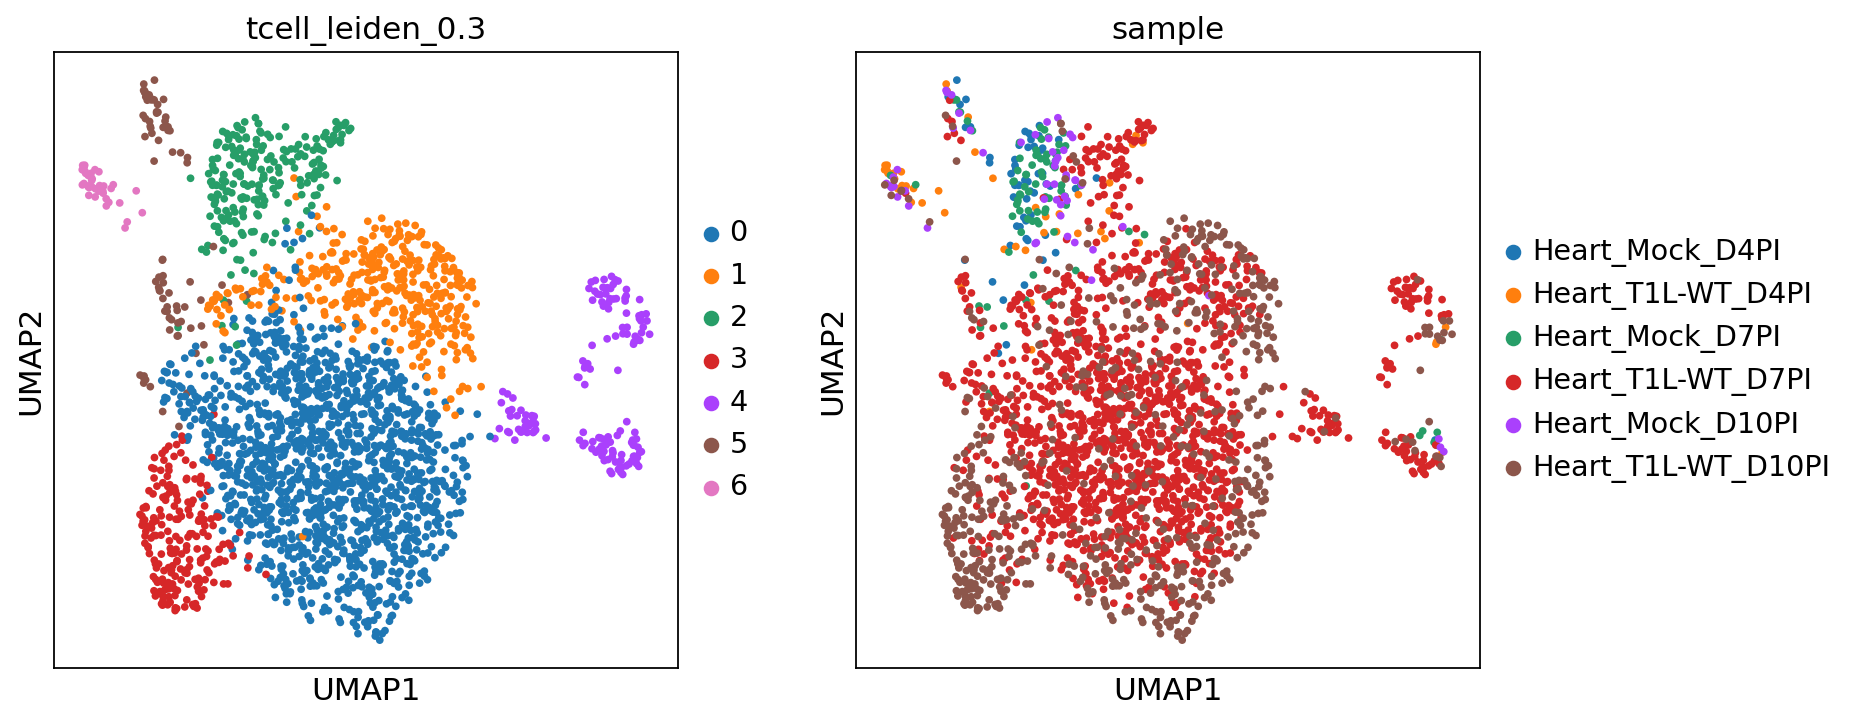

In [10]:
sc.pl.umap(tcells, color = ["tcell_leiden_0.3", "sample"])

In [60]:
tcells_only = tcells[~tcells.obs["tcell_leiden_0.3"].isin(["4", "5", "6"]),]

In [61]:
sc.tl.rank_genes_groups(tcells_only, groupby='tcell_leiden_0.3', method='wilcoxon', key_added='rank_genes_groups_tcell_leiden_0.3')

ranking genes


Trying to set attribute `.uns` of view, copying.


    finished: added to `.uns['rank_genes_groups_tcell_leiden_0.3']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:03)


In [98]:
pd.DataFrame(tcells_only.uns['rank_genes_groups_tcell_leiden_0.3']["names"]).head(20)

,0,1,2,3
0,Gzmb,Tnfrsf4,Rps24,Ccl5
1,Cd8a,Cd4,Tpt1,Gzma
2,Gzmk,Tnfrsf18,Rps3,Klf2
3,Gzma,Ifitm3,Rps14,H2afz
4,Cd8b1,Gadd45b,Rpl32,Nkg7
5,Ctla2a,Maf,Rps5,Lgals1
6,Jaml,Icos,Rpl8,Rap1b
7,Plac8,S100a4,Rack1,Cd48
8,Prf1,Hif1a,Eef1a1,Emp3
9,Cmtm7,Traf1,Rplp0,H2-Q7


In [72]:
tcells_only.obs["cell_phenotypes"] = tcells_only.obs["tcell_leiden_0.3"]
phenotypes = {'2': "Uninflamed T-cells", 
                '1': "Helper T-cells", 
                '0': "Cytotoxic T-cells 1",
                '3': "Cytotoxic T-cells 2"}
tcells_only.obs["cell_phenotypes"] = tcells_only.obs["cell_phenotypes"].map(phenotypes).astype("category")

In [73]:
sc.tl.rank_genes_groups(tcells_only, groupby='cell_phenotypes', method='wilcoxon', key_added='rank_genes_groups_cell_phenotypes')

ranking genes
    finished: added to `.uns['rank_genes_groups_cell_phenotypes']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:03)


In [75]:
sc.tl.dendrogram(tcells_only, groupby='cell_phenotypes')

    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_cell_phenotypes']`


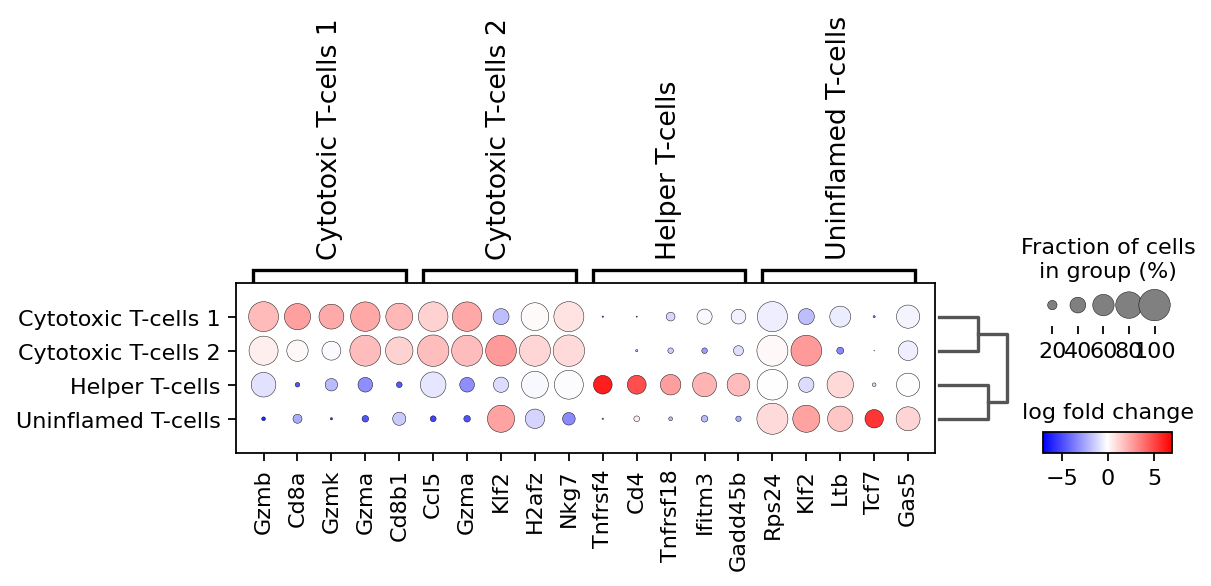

In [76]:
sc.settings.set_figure_params(dpi=80, dpi_save= 300, fontsize=12, frameon=True, figsize=(3, 3), transparent=True, format="pdf")
fig, ax = plt.subplots(figsize = (7.5,2.5))
sc.pl.rank_genes_groups_dotplot(tcells_only, n_genes=5, key="rank_genes_groups_cell_phenotypes", values_to_plot='logfoldchanges', min_logfoldchange=1.0, vmax=7, vmin=-7, cmap='bwr', show=False, ax=ax)
# plt.tight_layout()
plt.savefig("./figures/tcell_dotplot.pdf")

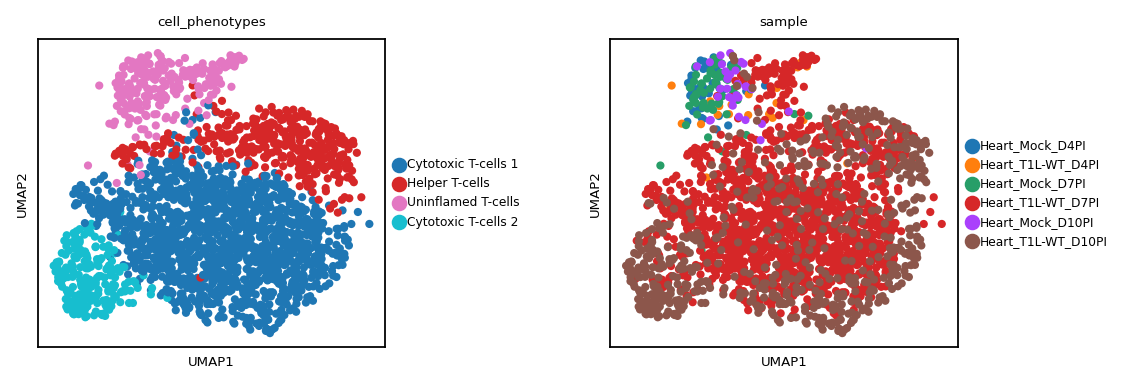

In [88]:
sc.settings.set_figure_params(dpi=80, dpi_save= 300, fontsize=6, facecolor='white', frameon=True, figsize=(2.5, 2.5), vector_friendly = False, transparent=True, format="pdf")
sc.pl.umap(tcells_only, color = ["cell_phenotypes", "sample"], wspace=0.5)

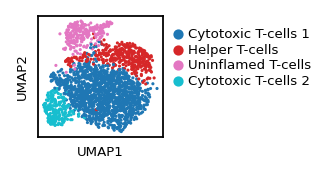

In [84]:
sc.settings.set_figure_params(dpi=80, dpi_save= 300, fontsize=6, facecolor='white', frameon=True, figsize=(2.5, 2.5), vector_friendly = False, transparent=True, format="pdf")
fig, ax = plt.subplots(figsize = (1.0, 1.0))
sc.pl.umap(tcells_only, color = ["cell_phenotypes"], size=8, palette="tab10", title="", show=False, ax = ax)
plt.legend(ncol=1, prop={'size': 6}, handletextpad=0.5, markerscale = 0.6, frameon = False, labelspacing = 0.2, bbox_to_anchor = (1.0,1.0))
# plt.tight_layout()
plt.savefig("figures/umap_tcells_celltypes_03.pdf")

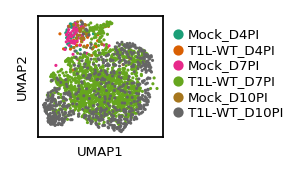

In [82]:
sc.settings.set_figure_params(dpi=80, dpi_save= 300, fontsize=6, facecolor='white', frameon=True, vector_friendly = False, figsize=(2.5, 2.5), transparent=True, format="pdf")
fig, ax = plt.subplots(figsize = (1.0, 1.0))
sc.pl.umap(tcells_only, color = ["condition"], size=8, palette="Dark2", title="", show=False, ax = ax)
plt.legend(ncol=1, prop={'size': 6}, handletextpad=0.5, markerscale = 0.6, frameon = False, labelspacing = 0.2, bbox_to_anchor = (1.0,1.0))
# plt.tight_layout()
plt.savefig("figures/umap_tcells_condition.pdf")

No handles with labels found to put in legend.


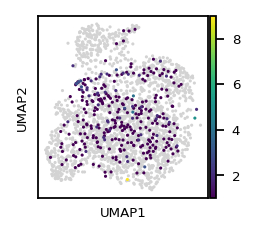

In [102]:
sc.settings.set_figure_params(dpi=80, dpi_save= 300, fontsize=6, facecolor='white', frameon=True, figsize=(2.5, 2.5), vector_friendly = False, transparent=True, format="pdf")
fig, ax = plt.subplots(figsize = (1.5, 1.5))
sc.pl.umap(tcells_only, color = ["total_viral_xGen3_NA"], size=8, palette="Dark2", title="", show=False, ax = ax)
plt.legend(ncol=1, prop={'size': 6}, handletextpad=0.5, markerscale = 0.6, frameon = False, labelspacing = 0.2, bbox_to_anchor = (1.0,1.0))
# plt.tight_layout()
plt.savefig("figures/umap_tcells_viral.pdf")

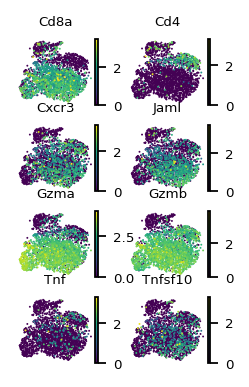

-----
anndata     0.7.5
scanpy      1.8.1
sinfo       0.3.1
-----
OpenSSL             20.0.1
PIL                 8.1.1
adjustText          NA
anndata             0.7.5
anyio               NA
appdirs             1.4.4
argon2              20.1.0
asciitree           NA
attr                20.3.0
babel               2.9.0
backcall            0.2.0
bioservices         1.7.11
brotli              NA
bs4                 4.9.3
bson                NA
cairo               1.20.0
certifi             2021.05.30
cffi                1.14.5
chardet             4.0.0
cloudpickle         1.3.0
colorama            0.4.4
colorlog            NA
cryptography        3.4.4
cycler              0.10.0
cython_runtime      NA
dask                2021.02.0
dateutil            2.8.1
decorator           4.4.2
descartes           NA
docutils            0.16
easydev             0.11.0
fasteners           NA
future_fstrings     NA
google              NA
gprofiler           1.0.0
gridfs              NA
gseapy            

In [43]:
sc.settings.set_figure_params(dpi=80, dpi_save= 300, fontsize=6, facecolor='white', frameon=True, figsize=(0.6, 0.6), transparent=True, format="pdf")
# fig, ax = plt.subplots(figsize = (0.6, 0.6))
sc.pl.umap(tcells_only, color = ["Cd8a", "Cd4", "Cxcr3", "Jaml", "Gzma", "Gzmb", "Tnf", "Tnfsf10"], size=3, cmap="viridis", wspace = 0.3, hspace = 0.3, ncols=2, add_outline=False, frameon=False, save="tcellsfeatureplot.pdf")
# plt.legend(ncol=1, prop={'size': 6}, handletextpad=0.5, markerscale = 0.6, frameon = False, labelspacing = 0.2, bbox_to_anchor = (1.0,1.0))
# plt.tight_layout()
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()
sc.settings.set_figure_params(dpi=80, dpi_save= 300, fontsize=6, frameon=True, figsize=(3, 3), transparent=True, format="pdf")

In [104]:
tcells_only.write_h5ad("./../pyobjs/tcells_only.h5ad")

In [3]:
tcells_only = sc.read_h5ad("./../pyobjs/tcells_only.h5ad")

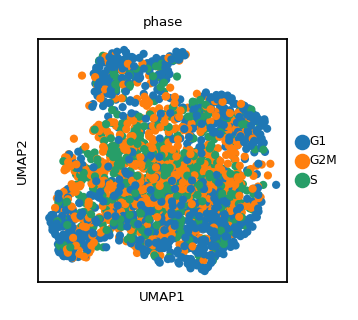

In [127]:
sc.pl.umap(tcells_only, color = ["phase"])

In [81]:
sc.tl.rank_genes_groups(tcells_only, groupby="tcell_leiden_0.3", groups=["0"], reference = "2", key_added="cyto_tcell_markers")

ranking genes
    finished: added to `.uns['cyto_tcell_markers']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)


In [82]:
cyto_tcell_markers = sc.get.rank_genes_groups_df(tcells_only, group="0", key="cyto_tcell_markers")
cyto_tcell_markers.to_csv("./../csvs/tcell_only_cyto_tcell_markers.csv")
print(cyto_tcell_markers[1:25])

       names     scores  logfoldchanges          pvals      pvals_adj
1       Gzmk  44.029121        6.009210  7.162574e-244  9.565617e-240
2       Gzma  39.994179        5.191748  1.362828e-127  1.516714e-124
3       Ccl5  39.263897        5.247189  7.174627e-126  6.844081e-123
4       Ccl4  38.868454        8.467711  1.687960e-230  1.127135e-226
5     S100a6  37.066177        4.894217  1.781179e-110  1.321536e-107
6     S100a4  36.519932        5.444256  3.544376e-176  6.762164e-173
7     Lgals3  36.358959        5.200928  1.614754e-158  2.695630e-155
8      Cxcr6  35.931114        6.561320  8.607139e-208  3.831612e-204
9       Ifng  34.293949        5.672369  1.455778e-182  4.860478e-179
10     Klrk1  32.530128        6.906740  4.023254e-179  1.074611e-175
11       Id2  31.878122        4.361842  1.286378e-102  7.808898e-100
12  AA467197  28.921654        5.889399  7.495589e-149  1.112262e-145
13      Ccr5  28.600901        5.115307  5.216491e-136  6.333294e-133
14     Klrg1  27.572

In [84]:
#?gseapy.enrichr
de_results = sc.get.rank_genes_groups_df(tcells_only, group="0", key="cyto_tcell_markers")
de_results = de_results[(de_results["logfoldchanges"] > 1.0) & (de_results["pvals_adj"] < 0.01)]
glist = de_results['names'].squeeze().str.strip().tolist()
print(glist)

['Gzmb', 'Gzmk', 'Gzma', 'Ccl5', 'Ccl4', 'S100a6', 'S100a4', 'Lgals3', 'Cxcr6', 'Ifng', 'Klrk1', 'Id2', 'AA467197', 'Ccr5', 'Klrg1', 'Ctla2a', 'Fgl2', 'Anxa2', 'Ccr2', 'Gng2', 'Cmtm7', 'Prf1', 'Bhlhe40', 'Slamf7', 'Mt1', 'Glrx', 'Gimap7', 'S100a11', 'Coro2a', 'Pclaf', 'Havcr2', 'Gm19585', 'Tpi1', 'Efhd2', 'Nkg7', 'Mki67', 'Rgs1', 'Lgals1', 'Ccl3', 'Fasl', 'Prc1', 'Bcl2a1b', 'Ahnak', 'AW112010', 'Serpinb9', 'Serpinb6b', 'Wdr95', 'Itgax', 'Plac8', 'Bcl2a1d', 'Lag3', 'Entpd1', 'Ctsd', 'Atp8b4', 'Ifitm1', 'Ly6c2', 'Esm1', 'Tmem163', 'Kif4', 'Dapk2', 'Hopx', 'Cd8a', 'Osbpl3', 'Gapdh', 'Hip1', 'Tnfrsf9', 'Sdf2l1', 'Spc24', 'Lrrk1', 'Il18rap', 'Cmc2', 'Klrc1', 'Itga1', 'Arsb', 'Ncapg', 'Ube2c', 'Ctsw', 'Lig1', 'Birc5', 'Rrm1', 'Thy1', 'Rrm2', 'Gm6637', 'Acadl', 'Plek', 'Atp2b4', 'Hist1h1b', 'Smc2', 'Nucb1', 'Gmnn', 'Tyms', 'Cks1b', 'Sytl2', 'Asf1b', 'Cdca8', 'Acot7', 'Tbcb', 'Bub1', 'Pgk1', 'Ccna2', 'Tuba1b', 'Nusap1', 'Mxd3', 'Diaph3', 'Ehd4', 'Clspn', 'Gpr68', 'Il12rb2', 'Cdk1', 'Plk1', 'Cd

In [92]:
# GO_Biological_Process_2021, KEGG_2019_Mouse, WikiPathways_2019_Mouse
enr_res = gseapy.enrichr(gene_list=glist, 
                     organism='Mouse',
                     gene_sets=['GO_Biological_Process_2021'],
                     description='pathway', 
                     cutoff = 0.01)

Connecting to Enrichr Server to get latest library names
Analysis name: pathway, Enrichr Library: GO_Biological_Process_2021
Save file of enrichment results: Job Id:ce3dd892a957d32dfd32ff482c759d41
Done.



In [129]:
enr_res.results[50:100]

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
50,GO_Biological_Process_2021,chromatin remodeling at centromere (GO:0031055),23/32,2.368211e-09,2.434638e-07,0,0,9.116296,181.059941,HELLS;CENPV;CENPW;CENPX;HJURP;SMARCA5;KNL1;CEN...
51,GO_Biological_Process_2021,RNA export from nucleus (GO:0006405),51/106,2.391860e-09,2.434638e-07,0,0,3.319312,65.892306,NUP107;NXT1;EIF4A3;GLE1;ALKBH5;HHEX;MAGOH;NUP6...
52,GO_Biological_Process_2021,DNA strand elongation involved in DNA replicat...,16/18,2.790528e-09,2.786842e-07,0,0,28.505138,561.466706,GINS1;GINS2;RFC3;PCNA;RFC4;LIG1;MCM7;GINS3;GIN...
53,GO_Biological_Process_2021,nuclear membrane reassembly (GO:0031468),32/54,3.363727e-09,3.273931e-07,0,0,5.195091,101.357348,NUP205;POM121;NUP107;UBXN2A;NUP160;PPP2CA;CCNB...
54,GO_Biological_Process_2021,cellular response to hypoxia (GO:0071456),59/131,3.401969e-09,3.273931e-07,0,0,2.935524,57.239516,SUV39H1;HILPDA;RORA;PSMD8;PSMD9;PSMD6;PSMD7;PS...
55,GO_Biological_Process_2021,mRNA transport (GO:0051028),50/104,3.532707e-09,3.339039e-07,0,0,3.313941,64.493275,NUP107;NXT1;EIF4A3;GLE1;ALKBH5;HHEX;MAGOH;NUP6...
56,GO_Biological_Process_2021,tumor necrosis factor-mediated signaling pathw...,54/116,3.661405e-09,3.399968e-07,0,0,3.118510,60.578361,TRADD;ILK;TNFRSF13C;TXNDC17;PSMD8;PYCARD;PSMD9...
57,GO_Biological_Process_2021,cellular macromolecule biosynthetic process (G...,114/314,3.941151e-09,3.596640e-07,0,0,2.051121,39.692874,RPL31;RPS17;HELB;CHEK1;PCLAF;TIPIN;MRPS18A;GTP...
58,GO_Biological_Process_2021,mitochondrial respiratory chain complex assemb...,45/90,4.478582e-09,4.017819e-07,0,0,3.577011,68.764324,COX19;NDUFB9;NDUFA13;NDUFB8;NDUFB7;NDUFA11;COX...
59,GO_Biological_Process_2021,NIK/NF-kappaB signaling (GO:0038061),39/74,7.037904e-09,6.208605e-07,0,0,3.982881,74.766460,PSMD12;PSMD11;PSMD14;PSMD13;CUL1;MALT1;PSMB10;...


<ipython-input-132-aeef6d204e1a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


(20, 11)


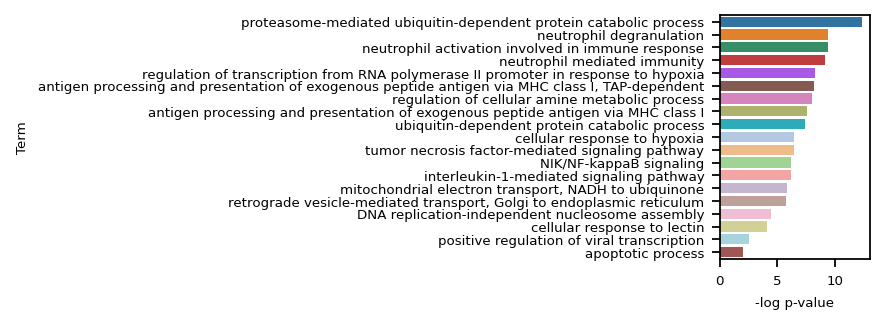

In [132]:
GO_results = enr_res.results
GO_results["-log p-value"] =  -1 * np.log10(GO_results["Adjusted P-value"]) 
GO_results = GO_results.iloc[[1,12,24,26,28,32,33,36,38,40,54,56,59,60,68,69,86,93,163,210],]
GO_results["Term"] = [x.split(" (")[0] for x in GO_results["Term"]]
print(GO_results.shape)

sc.settings.set_figure_params(dpi_save= 400, fontsize=6, facecolor='white', frameon=True, transparent=True, format="pdf")
fig, ax = plt.subplots(figsize=(1.2,2.0))
plt.rc('font', size=6)
ax.set_axisbelow(True)
plt.grid(b=None)
g = sns.barplot(y = "Term", x = "-log p-value", data= GO_results[1:20], ax=ax)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='right')
# plt.tight_layout()
# plt.show()
plt.savefig("figures/go_enrich_cyto_tcells.pdf", facecolor='w', edgecolor='w',
        orientation='potrait', format="pdf",
        transparent=True, metadata=None)

In [119]:
print(enr_res.results.loc[2,"Term"])
print([x.capitalize() for x in enr_res.results.loc[2,"Genes"].split(";")])
print(enr_res.results.loc[12,"Term"])
print([x.capitalize() for x in enr_res.results.loc[12,"Genes"].split(";")])
print(enr_res.results.loc[26,"Term"])
print([x.capitalize() for x in enr_res.results.loc[26,"Genes"].split(";")])
print(enr_res.results.loc[33,"Term"])
print([x.capitalize() for x in enr_res.results.loc[33,"Genes"].split(";")])
print(enr_res.results.loc[56,"Term"])
print([x.capitalize() for x in enr_res.results.loc[59,"Genes"].split(";")])
print(enr_res.results.loc[59,"Term"])
print([x.capitalize() for x in enr_res.results.loc[59,"Genes"].split(";")])
print(enr_res.results.loc[60,"Term"])
print([x.capitalize() for x in enr_res.results.loc[60,"Genes"].split(";")])
print(enr_res.results.loc[163,"Term"])
print([x.capitalize() for x in enr_res.results.loc[163,"Genes"].split(";")])
print(enr_res.results.loc[210,"Term"])
print([x.capitalize() for x in enr_res.results.loc[210,"Genes"].split(";")])

microtubule cytoskeleton organization involved in mitosis (GO:1902850)
['Gpsm2', 'Ercc6l', 'Nup107', 'Zwilch', 'Bub1b', 'Kif11', 'Cdc20', 'Ppp1cc', 'Xpo1', 'Stmn1', 'Nuf2', 'Nusap1', 'Rcc1', 'Kntc1', 'Spdl1', 'Dlgap5', 'Nudc', 'Nup133', 'Knl1', 'Dynll1', 'Rangap1', 'Tubg1', 'Ckap5', 'Dynll2', 'Eml4', 'Sgo1', 'Dync1li1', 'Clip1', 'Dync1li2', 'Espl1', 'Incenp', 'Birc5', 'Kif2c', 'Mapre1', 'Kpnb1', 'Mad1l1', 'Itgb3bp', 'Dctn2', 'Mis12', 'Cdca8', 'Ttk', 'Wdr62', 'Pmf1', 'Cenpa', 'Nup160', 'Ska1', 'Aurkb', 'Nsl1', 'Ska2', 'Aurka', 'Ptpa', 'Ccnb1', 'Dsn1', 'Nup85', 'Map4', 'Bub1', 'Ranbp2', 'Stil', 'Nek6', 'Nde1', 'Plk1', 'Ndc80', 'Zwint', 'Cenpe', 'Kif18a', 'Cenpf', 'Cenph', 'Cenpi', 'Tbce', 'Cenpk', 'Cenpl', 'Tacc3', 'Cenpm', 'Cenpn', 'B9d2', 'Cenpp', 'Cenpq', 'Ran', 'Spc24', 'Cenps', 'Mad2l1', 'Nup37', 'Spc25']
proteasome-mediated ubiquitin-dependent protein catabolic process (GO:0043161)
['Ubxn2a', 'Ccnf', 'Ltn1', 'Bub1b', 'Aup1', 'Cdc20', 'Psmd8', 'Psmd9', 'Psmd6', 'Psmd7', 'Maea', 'Ptt

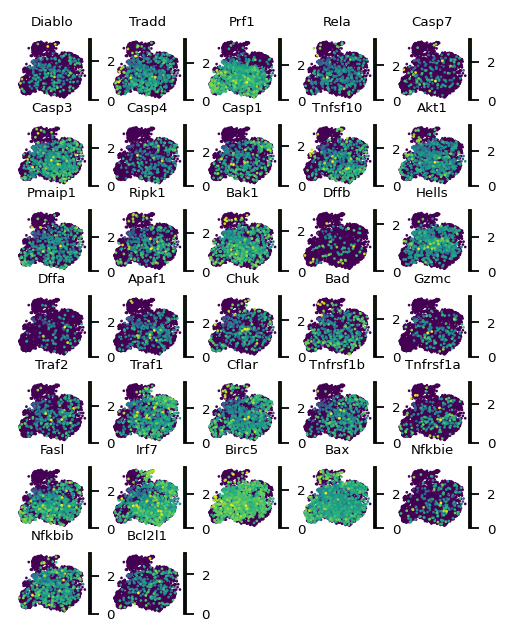

In [74]:
sc.pl.umap(tcells_only, color = [x.capitalize() for x in enr_res.results.loc[11,"Genes"].split(";")], size=6, cmap="viridis", wspace = 0.2, hspace = 0.4, ncols=5, frameon=False, add_outline=False)

In [76]:
heart_infection_visium_no_viral_genes = sc.read_h5ad('./../pyobjs/heart_infection_visium_no_viral_genes.h5ad')

In [120]:
sc.tl.score_genes(heart_infection_visium_no_viral_genes, [x.capitalize() for x in enr_res.results.loc[2,"Genes"].split(";")], use_raw=True, score_name = 'tcells_microtubule_activity_score')
sc.tl.score_genes(heart_infection_visium_no_viral_genes, [x.capitalize() for x in enr_res.results.loc[12,"Genes"].split(";")], use_raw=True, score_name = 'tcells_proteosome_activity_score')
sc.tl.score_genes(heart_infection_visium_no_viral_genes, [x.capitalize() for x in enr_res.results.loc[26,"Genes"].split(";")], use_raw=True, score_name = 'tcells_neutrophil_activity_score')
sc.tl.score_genes(heart_infection_visium_no_viral_genes, [x.capitalize() for x in enr_res.results.loc[33,"Genes"].split(";")], use_raw=True, score_name = 'tcells_ap_activity_score')
sc.tl.score_genes(heart_infection_visium_no_viral_genes, [x.capitalize() for x in enr_res.results.loc[56,"Genes"].split(";")], use_raw=True, score_name = 'tcells_tnf_activity_score') 
sc.tl.score_genes(heart_infection_visium_no_viral_genes, [x.capitalize() for x in enr_res.results.loc[59,"Genes"].split(";")], use_raw=True, score_name = 'tcells_nfkb_activity_score')
sc.tl.score_genes(heart_infection_visium_no_viral_genes, [x.capitalize() for x in enr_res.results.loc[60,"Genes"].split(";")], use_raw=True, score_name = 'tcells_il1_activity_score')

sc.tl.score_genes(heart_infection_visium_no_viral_genes, [x.capitalize() for x in enr_res.results.loc[163,"Genes"].split(";")], use_raw=True, score_name = 'tcells_viral_transcription_activity_score')
sc.tl.score_genes(heart_infection_visium_no_viral_genes, [x.capitalize() for x in enr_res.results.loc[210,"Genes"].split(";")], use_raw=True, score_name = 'tcells_apoptosis_activity_score')

computing score 'tcells_microtubule_activity_score'
    finished: added
    'tcells_microtubule_activity_score', score of gene set (adata.obs).
    993 total control genes are used. (0:00:00)
computing score 'tcells_proteosome_activity_score'
    finished: added
    'tcells_proteosome_activity_score', score of gene set (adata.obs).
    935 total control genes are used. (0:00:00)
computing score 'tcells_neutrophil_activity_score'
    finished: added
    'tcells_neutrophil_activity_score', score of gene set (adata.obs).
    1038 total control genes are used. (0:00:00)
computing score 'tcells_ap_activity_score'
    finished: added
    'tcells_ap_activity_score', score of gene set (adata.obs).
    549 total control genes are used. (0:00:00)
computing score 'tcells_tnf_activity_score'
    finished: added
    'tcells_tnf_activity_score', score of gene set (adata.obs).
    746 total control genes are used. (0:00:00)
computing score 'tcells_nfkb_activity_score'
    finished: added
    'tcells_

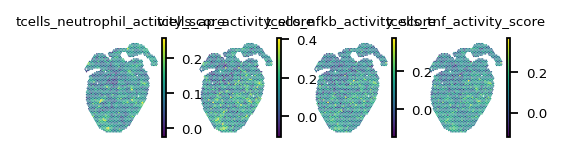

In [102]:
sc.settings.set_figure_params(dpi_save= 400, fontsize=6, figsize=(0.8,0.8), facecolor='white', frameon=True, vector_friendly = False, transparent=True, format="pdf")
sc.pl.spatial(heart_infection_visium_no_viral_genes[heart_infection_visium_no_viral_genes.obs["sample"] == 'T1L-Heart-D7PI', :].copy(), color=["tcells_neutrophil_activity_score", 'tcells_ap_activity_score', "tcells_nfkb_activity_score", "tcells_tnf_activity_score"], ncols=4, frameon=False, 
              library_id='T1L-Heart-D7PI', size=1.5, scale_factor=1.0, hspace=0.1, wspace=0.1, save = "tcells_spatial_module_scores.pdf")

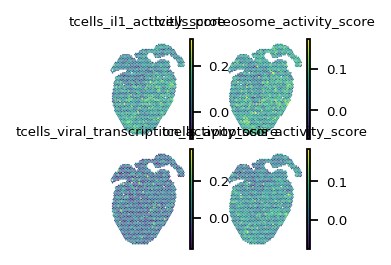

In [128]:
sc.settings.set_figure_params(dpi_save= 400, fontsize=6, figsize=(0.8,0.8), facecolor='white', frameon=True, vector_friendly = False, transparent=True, format="pdf")
sc.pl.spatial(heart_infection_visium_no_viral_genes[heart_infection_visium_no_viral_genes.obs["sample"] == 'T1L-Heart-D7PI', :].copy(), color=["tcells_il1_activity_score", 'tcells_proteosome_activity_score', "tcells_viral_transcription_activity_score", "tcells_apoptosis_activity_score" ], ncols=2, frameon=False, 
              library_id='T1L-Heart-D7PI', size=1.5, scale_factor=1.0, hspace=0.1, wspace=0.1, save = "tcells_spatial_supp_module_scores.pdf")

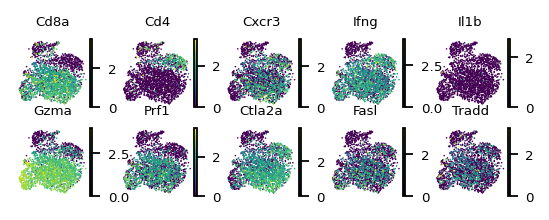

In [138]:
sc.settings.set_figure_params(dpi=80, dpi_save= 300, fontsize=6, facecolor='white', frameon=True, figsize=(0.6, 0.6), transparent=True, format="pdf")
# fig, ax = plt.subplots(figsize = (0.6, 0.6))
sc.pl.umap(tcells_only, color = ["Cd8a", "Cd4", "Cxcr3", "Ifng", "Il1b", "Gzma", "Prf1", "Ctla2a", "Fasl", "Tradd"], size=2, cmap="viridis", wspace = 0.3, hspace = 0.3, ncols=5, add_outline=False, frameon=False, save="tcellsfeatureplot.pdf")

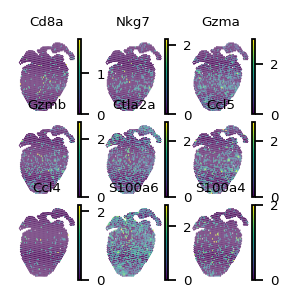

In [141]:
sc.settings.set_figure_params(dpi_save= 400, fontsize=6, figsize=(0.6,0.6), facecolor='white', frameon=True, vector_friendly = False, transparent=True, format="pdf")
sc.pl.spatial(heart_infection_visium_no_viral_genes[heart_infection_visium_no_viral_genes.obs["sample"] == 'T1L-Heart-D7PI', :].copy(), color=["Cd8a", "Nkg7", "Gzma", "Gzmb", "Ctla2a", "Ccl5", "Ccl4", "S100a6", "S100a4"], ncols=3, frameon=False, 
              library_id='T1L-Heart-D7PI', size=1.5, scale_factor=1.0, hspace=0.1, wspace=0.1, save = "tcellsspatialfeatureplot.pdf")